### Morocco World Cup 2022 squad

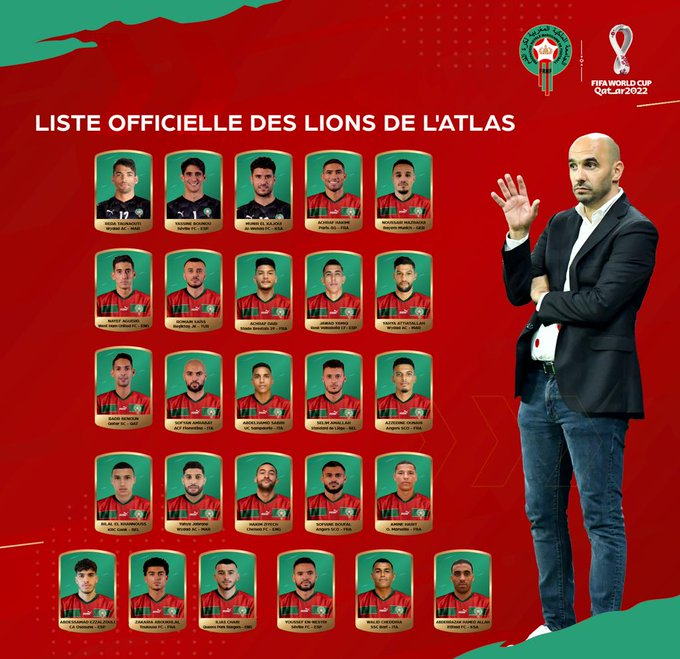

In [1]:
from IPython.display import Image
Image(filename='squad_list.jpg')

In [2]:
#imports here
import face_recognition
import cv2 as cv
import csv
import numpy as np
from datetime import datetime
import pandas as pd

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time

### Step 1: squad list using WebScraping

In [4]:
url="https://www.fourfourtwo.com/features/morocco-world-cup-2022-squad-vahid-halilhodzic-names-his-latest-squad"

In [5]:
#Disable Alerts/Notifications
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)

In [6]:
#specify the path to chromedriver.exe
driver = webdriver.Chrome('chromedriver.exe', chrome_options=chrome_options)
#open the webpage
squad=[]
driver.get(url=url)
for i in range(1,27):
    l=WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="article-body"]/ul/li[{i}]')))
    squad.append(l.text)

C:\Users\user\AppData\Local\Temp\ipykernel_2504\712523584.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe', chrome_options=chrome_options)
C:\Users\user\AppData\Local\Temp\ipykernel_2504\712523584.py:2: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver.exe', chrome_options=chrome_options)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=107.0.5304.107)
Stacktrace:
Backtrace:
	Ordinal0 [0x0036ACD3+2075859]
	Ordinal0 [0x002FEE61+1633889]
	Ordinal0 [0x001FB7BD+571325]
	Ordinal0 [0x001E2E1A+470554]
	Ordinal0 [0x0024AA0B+895499]
	Ordinal0 [0x0025AC96+961686]
	Ordinal0 [0x00247136+880950]
	Ordinal0 [0x0021FEFD+720637]
	Ordinal0 [0x00220F3F+724799]
	GetHandleVerifier [0x0061EED2+2769538]
	GetHandleVerifier [0x00610D95+2711877]
	GetHandleVerifier [0x003FA03A+521194]
	GetHandleVerifier [0x003F8DA0+516432]
	Ordinal0 [0x0030682C+1665068]
	Ordinal0 [0x0030B128+1683752]
	Ordinal0 [0x0030B215+1683989]
	Ordinal0 [0x00316484+1729668]
	BaseThreadInitThunk [0x75FCFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77877BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77877B8E+238]


In [7]:
l=['GK: Yassine Bounou (Sevilla)',
 'GK: Munir El Kajoui (Al Wehda)',
 'GK: Ahmed Reda Tagnaouti (Wydad Casablanca)',
 'DF: Nayef Aguerd (West Ham United)',
 'DF: Yahia Attiat Allah (Wydad Casablanca)',
 'DF: Badr Benoun (Qatar SC)',
 'DF: Achraf Dari (Stade Brest)',
 'DF: Jawad El Yamiq (Real Valladolid)',
 'DF: Achraf Hakimi (Paris Saint-Germain)',
 'DF: Noussair Mazraoui (Bayern Munich)',
 'DF: Romain Saiss (Besiktas)',
 'MF: Sofyan Amrabat (Fiorentina)',
 'MF: Selim Amallah (Standard Liege)',
 'MF: Bilal El Khannouss (Racing Genk)',
 'MF: Yahya Jabrane (Wydad Casablanca)',
 'MF: Azzedine Ounahi (Angers)',
 'MF: Abdelhamid Sabiri (Sampdoria)',
 'FW: Zakaria Aboukhlal (Toulouse)',
 'FW: Soufiane Boufal (Angers)',
 'FW: Ilias Chair (Queens Park Rangers)',
 'FW: Walid Cheddira (Bari)',
 'FW: Youssef En-Nesyri (Sevilla)',
 'FW: Abde Ezzalzouli (Osasuna)',
 'FW: Abderrazak Hamdallah (Al Ittihad)',
 'FW: Amine Harit (Olympique Marseille)',
 'FW: Hakim Ziyech (Chelsea)']

In [8]:
squad

In [9]:
squad

['GK: Yassine Bounou (Sevilla)',
 'GK: Munir El Kajoui (Al Wehda)',
 'GK: Ahmed Reda Tagnaouti (Wydad Casablanca)',
 'DF: Nayef Aguerd (West Ham United)',
 'DF: Yahia Attiat Allah (Wydad Casablanca)',
 'DF: Badr Benoun (Qatar SC)',
 'DF: Achraf Dari (Stade Brest)',
 'DF: Jawad El Yamiq (Real Valladolid)',
 'DF: Achraf Hakimi (Paris Saint-Germain)',
 'DF: Noussair Mazraoui (Bayern Munich)',
 'DF: Romain Saiss (Besiktas)',
 'MF: Sofyan Amrabat (Fiorentina)',
 'MF: Selim Amallah (Standard Liege)',
 'MF: Bilal El Khannouss (Racing Genk)',
 'MF: Yahya Jabrane (Wydad Casablanca)',
 'MF: Azzedine Ounahi (Angers)',
 'MF: Abdelhamid Sabiri (Sampdoria)',
 'FW: Zakaria Aboukhlal (Toulouse)',
 'FW: Soufiane Boufal (Angers)',
 'FW: Ilias Chair (Queens Park Rangers)',
 'FW: Walid Cheddira (Bari)',
 'FW: Youssef En-Nesyri (Sevilla)',
 'FW: Abde Ezzalzouli (Osasuna)',
 'FW: Abderrazak Hamdallah (Al Ittihad)',
 'FW: Amine Harit (Olympique Marseille)',
 'FW: Hakim Ziyech (Chelsea)']

In [10]:
squad=pd.Series(l)

In [11]:
squad=squad.apply(lambda s : s.split(': ')[1].split(' (')[0])

In [12]:
squad=list(squad)

In [13]:
with open('players_2022.txt', 'w') as f:
    for line in squad[:-1] :
        f.write(line)
        f.write('\n')
    f.write(squad[-1])

### Step 2: how to manipulate face_recognition

In [42]:
image = face_recognition.load_image_file("squad_list.jpg")
face_locations = face_recognition.face_locations(image)
face_locations

[(147, 607, 199, 556), (166, 281, 202, 245)]

In [46]:
known_image = face_recognition.load_image_file("WalidRegragui.jpg")
unknown_image = face_recognition.load_image_file("image.jpg")

regragi_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([regragi_encoding], unknown_encoding)

In [47]:
if results[0]==True:
    print('the same person : walid regragi')
else:
    

[True]

### Step 3: Extract and Process the Photos


In [14]:
with open('players_2022.txt') as f:
    lines = f.readlines()

In [34]:
from bing_image_downloader import downloader
for a in lines:
    t=a.split('\n')[0]    
    downloader.download(t, limit=5,  output_dir='dataset', 
    adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to c:\Users\user\Desktop\Github\Nouveau dossier (2)\moroccan player recognition\dataset\Yassine Bounou


[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from https://i.le360.ma/le360sport/sites/default/files/styles/img_738_520/public/assets/images/2018/02-reda/yassinebounougironavrealmadridlaligamuxjucrqg-xl.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.worldcupupdates.org/wp-content/uploads/2018/05/Yassine-Bounou.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.africatopsports.com/wp-content/uploads/2019/07/Yassine-Bounou-710x399.png
[%] File Downloaded !

[%] Downloading Image #4 from https://www.welovebuzz.com/wp-content/uploads/2018/12/yassin_bounou_141117.png
[%] File Downloaded !

[%] Downloading Image #5 from https://img.uefa.com/imgml/TP/players/9/2020/324x324/250118302.jpg
[%] File Downloaded !



[%] Done. Downloaded 5 images.
[%] Downloading Images to c:\Users\user\Desktop\Gith

KeyboardInterrupt: 

In [15]:
known=[]
names=[]

In [16]:
len(squad)

26

In [17]:
lines

['Yassine Bounou\n',
 'Munir El Kajoui\n',
 'Ahmed Reda Tagnaouti\n',
 'Nayef Aguerd\n',
 'Yahia Attiat Allah\n',
 'Badr Benoun\n',
 'Achraf Dari\n',
 'Jawad El Yamiq\n',
 'Achraf Hakimi\n',
 'Noussair Mazraoui\n',
 'Romain Saiss\n',
 'Sofyan Amrabat\n',
 'Selim Amallah\n',
 'Bilal El Khannouss\n',
 'Yahya Jabrane\n',
 'Azzedine Ounahi\n',
 'Abdelhamid Sabiri\n',
 'Zakaria Aboukhlal\n',
 'Soufiane Boufal\n',
 'Ilias Chair\n',
 'Walid Cheddira\n',
 'Youssef En-Nesyri\n',
 'Abde Ezzalzouli\n',
 'Abderrazak Hamdallah\n',
 'Amine Harit\n',
 'Hakim Ziyech']

In [38]:
Vid=cv.VideoCapture(0)

In [28]:

for i in range(7):
    print(i)
    a=lines[i].split('\n')[0]
    print(a)
    img=face_recognition.load_image_file('dataset/'+str(a)+'/Image_1.jpg')
    k=face_recognition.face_encodings(img)[0]
    known.append(k)
    names.append(a)

0
Yassine Bounou
1
Munir El Kajoui
2
Ahmed Reda Tagnaouti
3
Nayef Aguerd
4
Yahia Attiat Allah
5
Badr Benoun
6
Achraf Dari


In [37]:
players=names.copy()
face_loc=[]
face_enc=[]
face_names=[]
s=True

In [36]:
now=datetime.now()
current_date=now.strftime("%Y-%m-%d")

In [35]:
f=open(current_date+'.csv','w+',newline='')
lnwriter=csv.writer(f)

In [34]:
cascade_classifier = cv.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [39]:
while True:
    _,frame=Vid.read()
    s_frame=cv.resize(frame,(0,0),fx=0.25,fy=0.25)
    s_frame2=s_frame[:,:,::-1]
    gray = cv.cvtColor(frame, 0)
    detections = cascade_classifier.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=5)
    if(len(detections) > 0):
        (x,y,w,h) = detections[0]
        frame = cv.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    if s:
        face_loc=face_recognition.face_locations(s_frame2)
        face_enc=face_recognition.face_encodings(s_frame2,face_loc)
        face_names=[]
        for face_en in face_enc:
            m=face_recognition.compare_faces(known,face_en)
            name=""
            face_dist=face_recognition.face_distance(known,face_en)
            best_match_index=np.argmin(face_dist)
            if m[best_match_index]:
                name=names[best_match_index]
            face_names.append(name)
            if name in names:
                if name in players:
                    players.remove(name)
                    print(players)
                    current_time=now.strftime("%H-%M-%S")
                    lnwriter.writerow([name,current_time])
    cv.imshow("players world cup 2022",frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
Vid.release()
cv.destroyAllWindows()
f.close()

['Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Benoun', 'Achraf Dari', 'Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Yahia Attiat Allah', 'Badr Benoun', 'Achraf Dari']
['Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Benoun', 'Achraf Dari', 'Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Benoun', 'Achraf Dari']
['Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Achraf Dari', 'Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Benoun', 'Achraf Dari']
['Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Benoun', 'Achraf Dari']
['Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Yassine Bounou', 'Munir El Kajoui', 'Ahmed Reda Tagnaouti', 'Nayef Aguerd', 'Badr Be